Student Information

Name:Sibongakonke Kwanele Zungu

Student ID:108065432

GitHub ID: Sibonele

In [4]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import nltk
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D




In [5]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [7]:
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#Answer here
X.loc[0::1,'text'][0:10]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
isnull() did not work beacuse under the column 'missing_example' it was not defined how the program will further 
find the missing data even if it is entered as a string, basicallythe program has not been trained on how to see missing values or how they actualy look like actually look like. The program has not been trained on how to recognise if a certain word it encounters is a missing value or not 

---

In [8]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Every time you run the X_sample[0:4] code it gives you a random 4 values from the n=1000 which eas defined as the sample. 
simply randomly gives you different values 


In [10]:
# Answer here

X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X_sample = X.sample(n=10) #random state
#len(X_sample)
X_sample[0:4]


,text,category,category_name
1047,From: mmadsen@bonnie.ics.uci.edu (Matt Madsen)...,1,comp.graphics
1239,From: rjs002c@parsec.paradyne.com (Robert Syno...,1,comp.graphics
1528,From: lee@luke.rsg.hac.com (C. Lee) Subject: R...,1,comp.graphics
1272,From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

soc.religion.christian    264
comp.graphics             257
sci.med                   256
alt.atheism               223
Name: category_name, dtype: int64
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


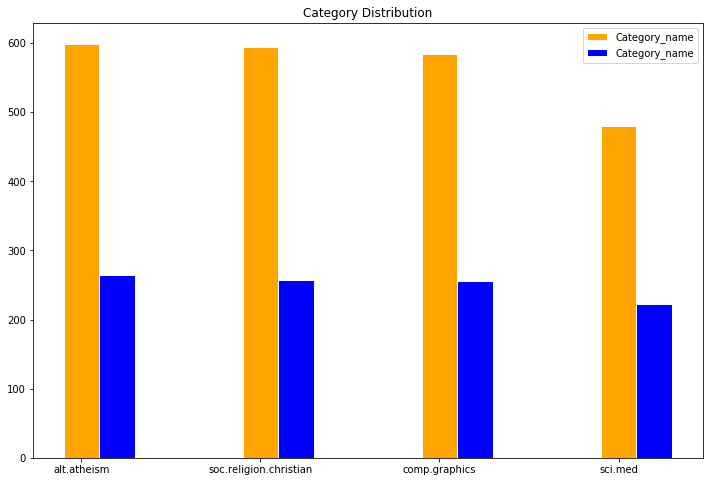

In [11]:
# Answer here

X_sample = X.sample(n=1000)
fig, ax = plt.subplots(figsize=(12, 8))

# plot barchart for X_sample
bar_plot2=X_sample.category_name.value_counts()
bar_plot1=X.category_name.value_counts()

print(X_sample.category_name.value_counts()) #is smaller
print(X.category_name.value_counts()) #is larger


# Subplot
xss=categories
x_pos = [i for i, _ in enumerate(xss)]
barWidth = 0.20
 
# set height of bar
bars1 = bar_plot1
bars2 =bar_plot2

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 # Add bar title
ax.set_title('Category Distribution')


# Make the plot
plt.xticks(x_pos,xss)
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Category_name')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Category_name')


# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

In [12]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [13]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

none_zero_values=X_counts[4, 0:100].nonzero()
for i in none_zero_values:
    print(none_zero_values)


(array([0, 0]), array([37,  0]))
(array([0, 0]), array([37,  0]))


In [15]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
#we add a new plot named plot_z to make a 3d plot
plot_z = X_counts[0:20, 0:20].toarray()

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

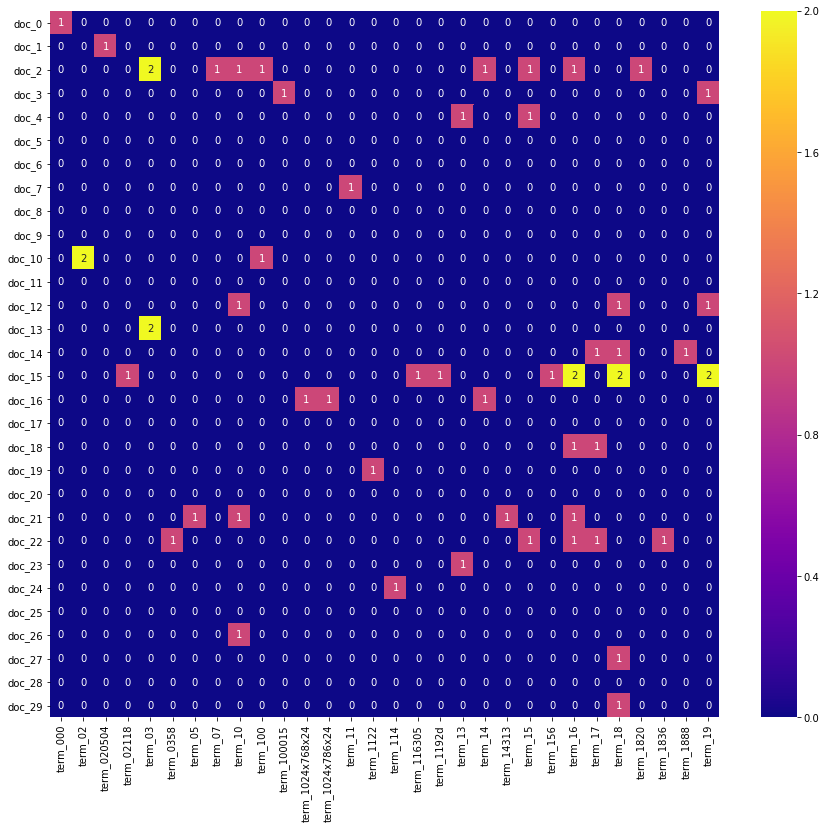

In [16]:
# Answer here
import seaborn as sns

#Instead of taking the first 20 articles and 20 terms, a random sample of 20 can be used.
X_sample = X.sample(n=30, replace=False)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_sample.text)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z = X_counts[0:30, 0:30].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 13))
ax = sns.heatmap(df_todraw,
                 cmap="plasma",annot=True)




With the above diagram, a sample was taken. It was evident that the first 20 elements do not give the desired output of does not give a good visualization. with a random sample we are able to get random selection from the whole data set and it returns more information than just the first 20. n=30 samples were taken.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

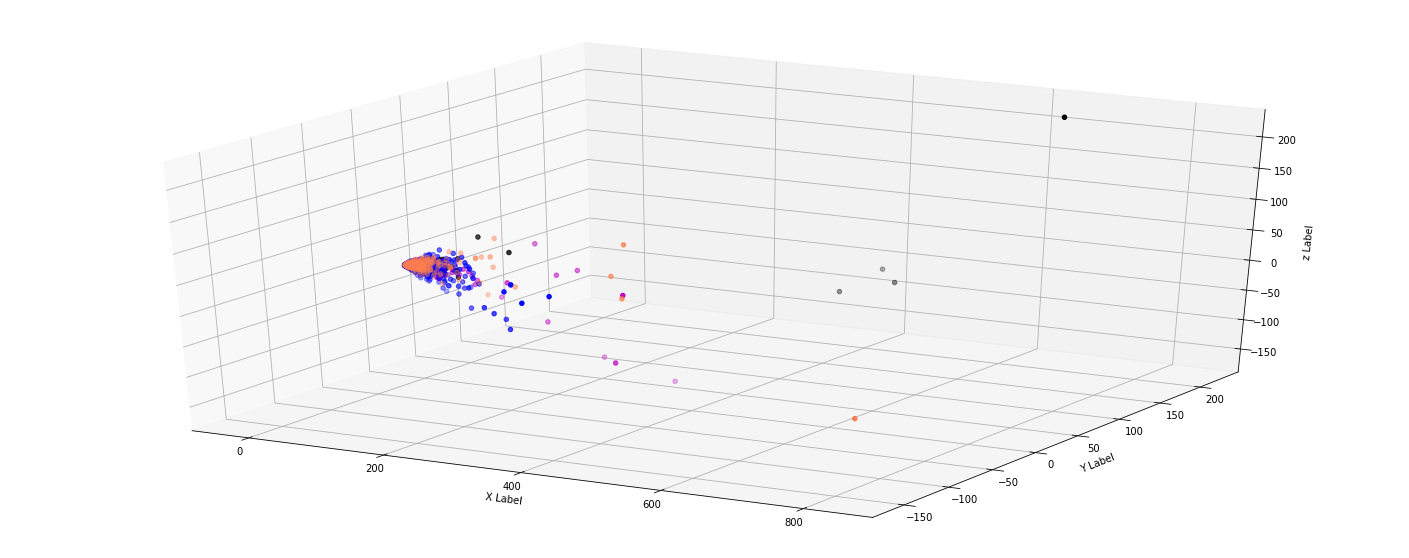

In [17]:
# Answer here

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']


# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nz Label')

plt.show()

# Set rotation angle to 180 degrees
ax.view_init(azim=90)

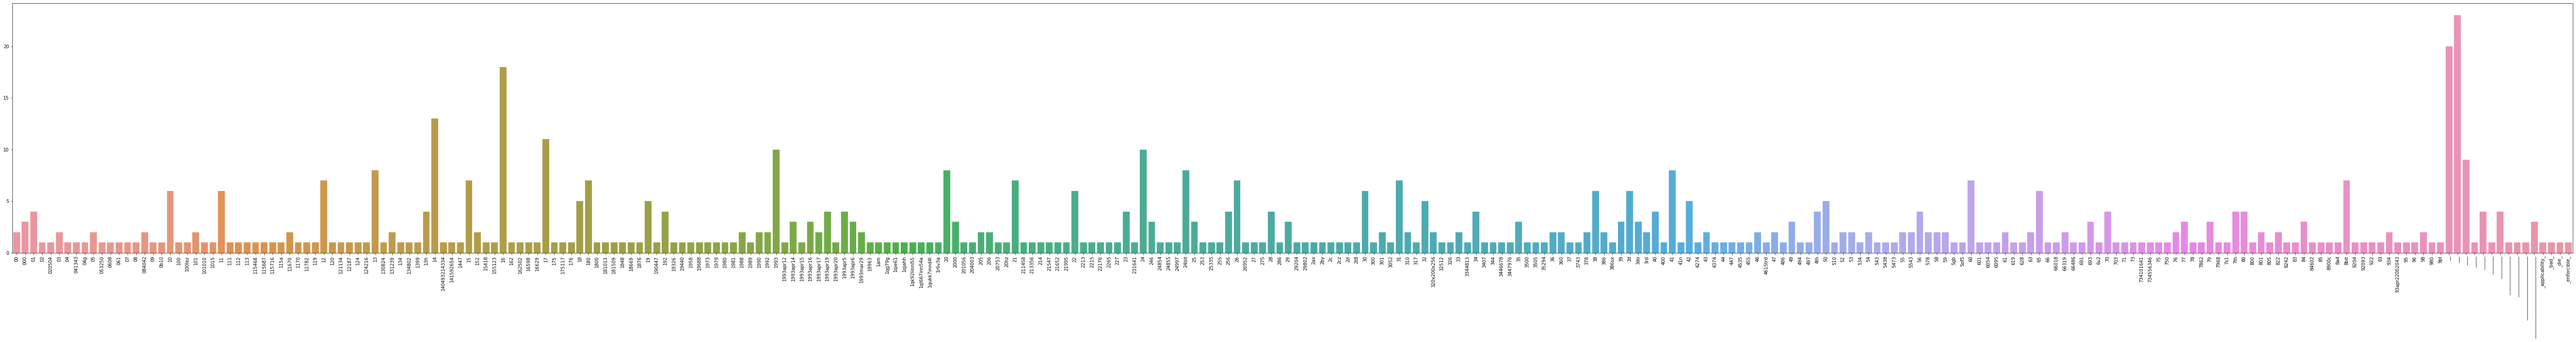

In [18]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
X_sample = X.sample(n=100)
X_counts = count_vect.fit_transform(X_sample.text)

term_frequencies = []
for j in range(0,X_counts.shape[0]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [19]:
term_frequencies[0]

2

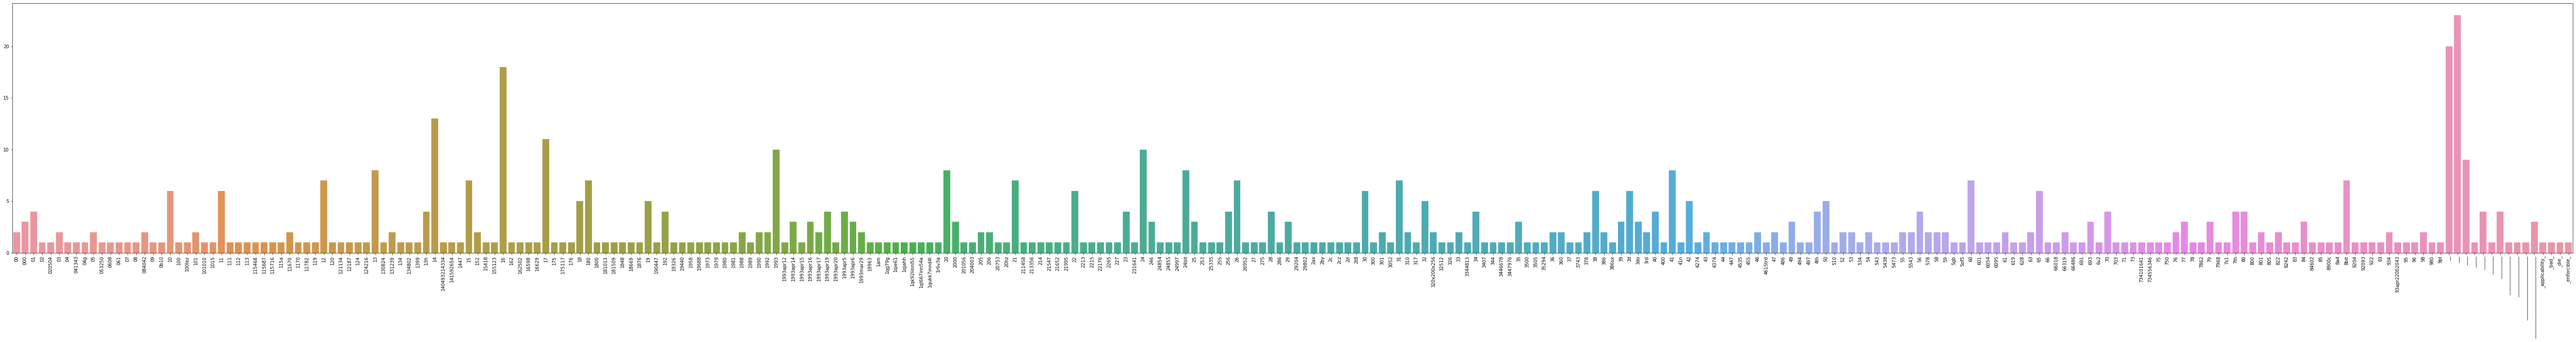

In [20]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

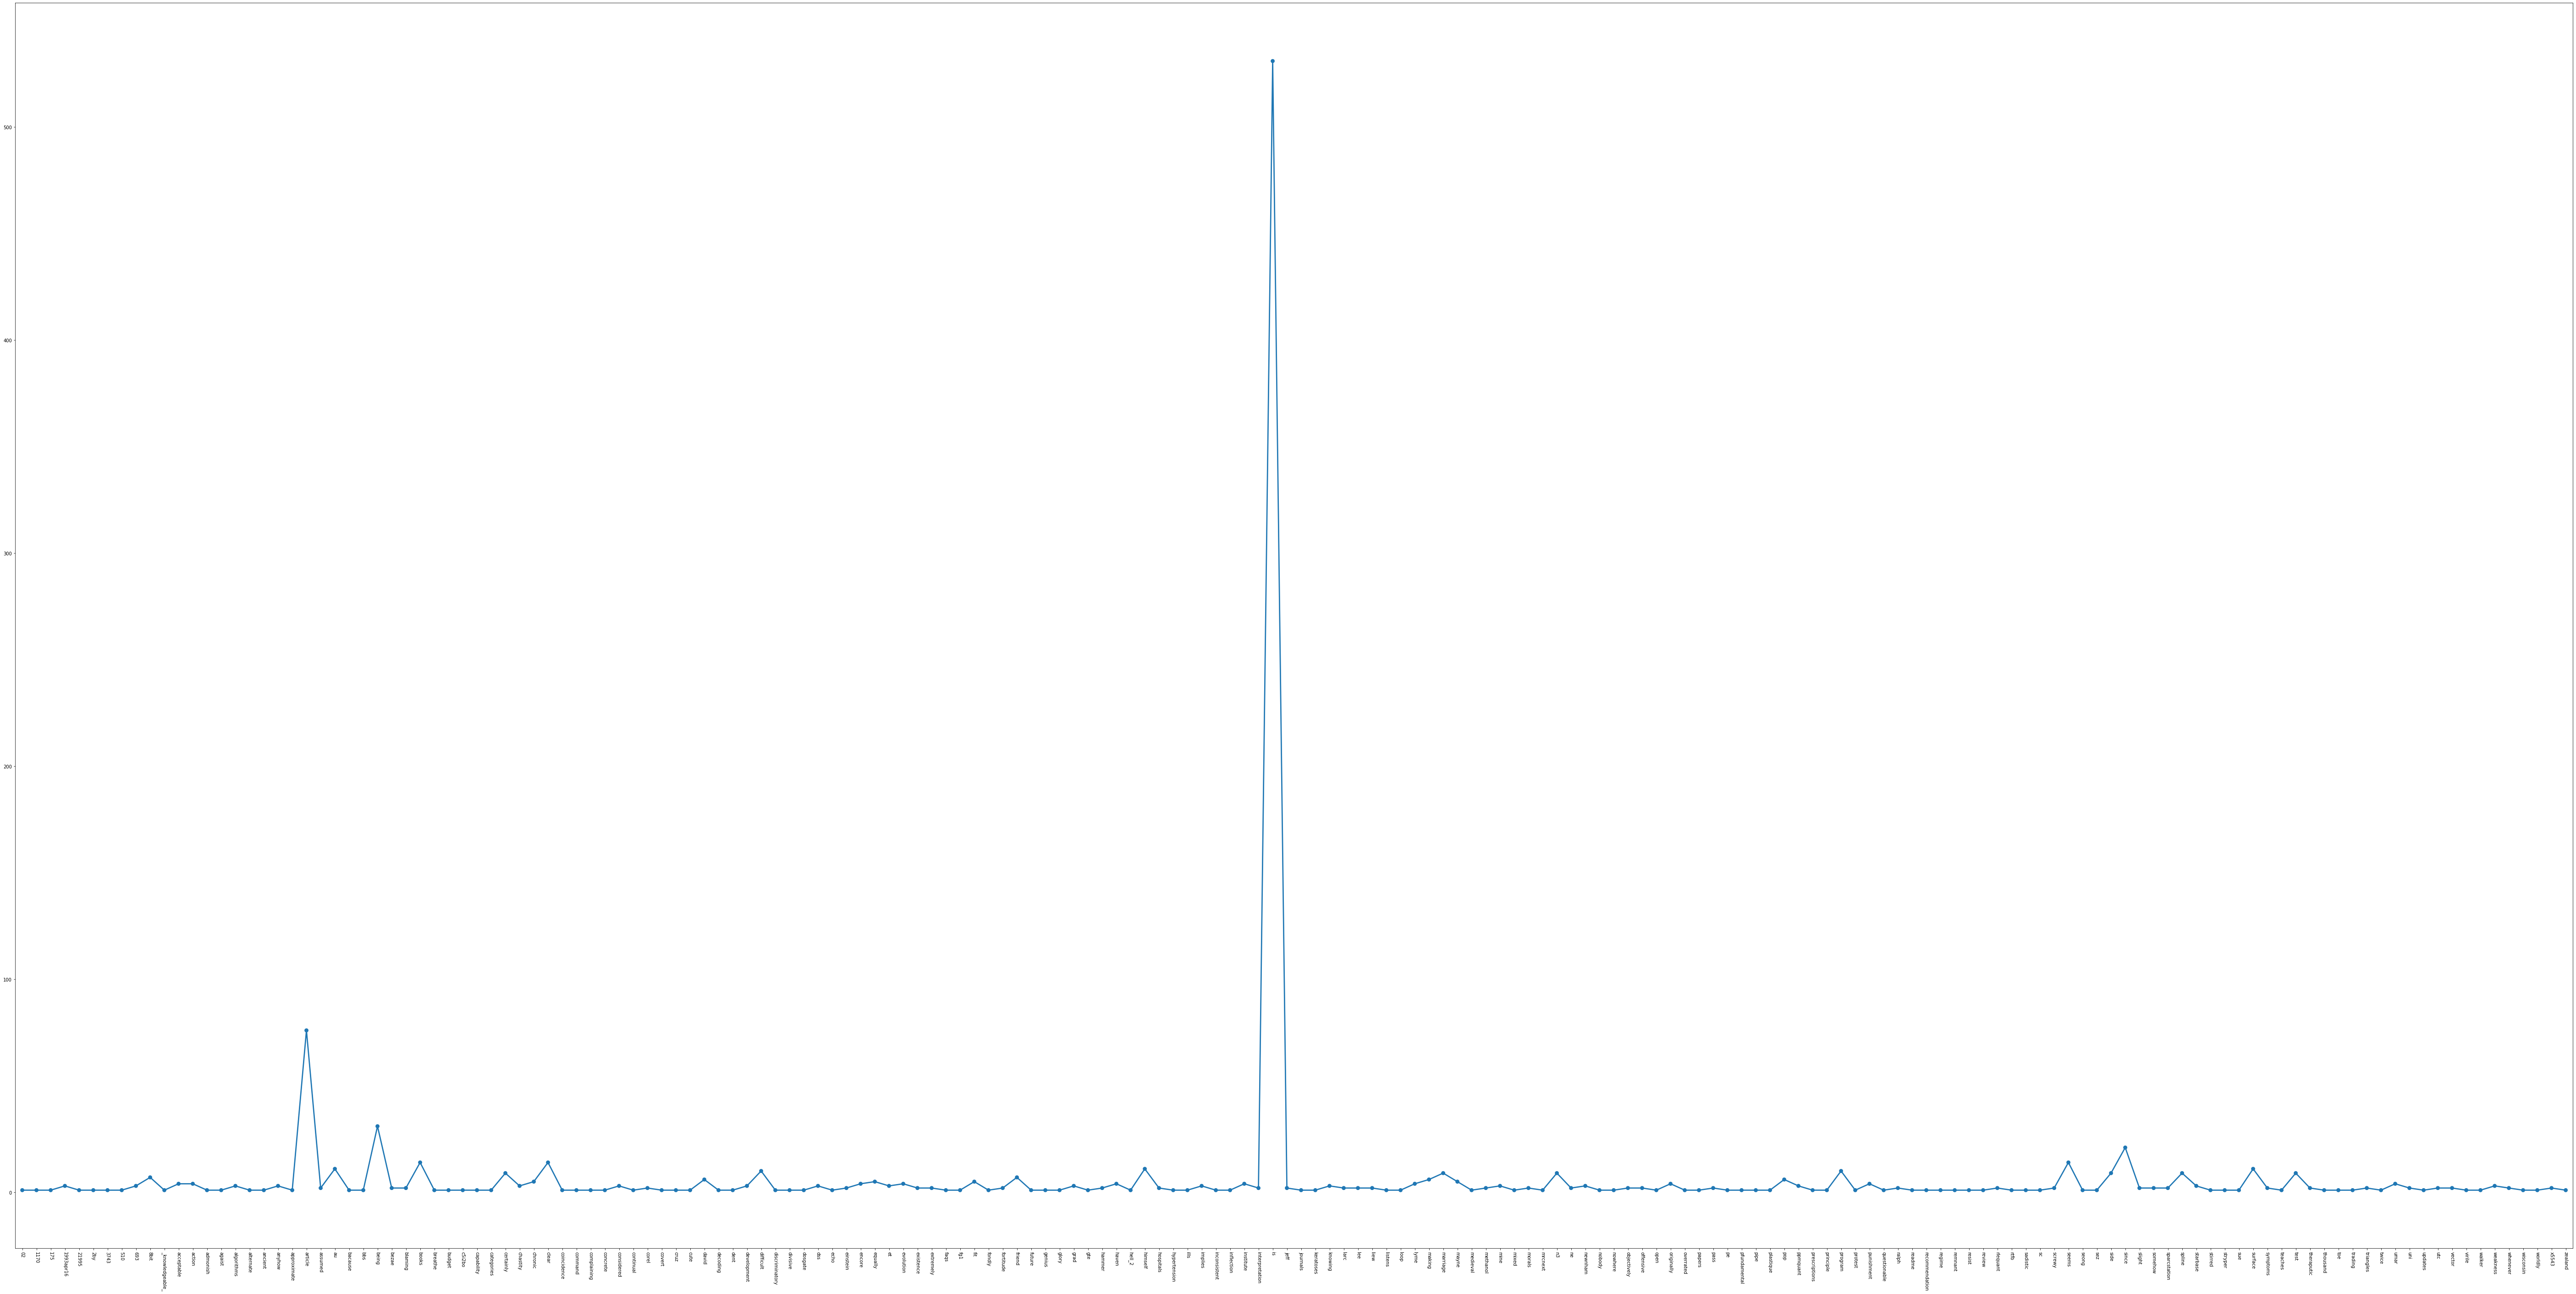

In [21]:
# Answer here
term_frequencies=np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 50))
g = sns.pointplot(x=count_vect.get_feature_names()[3::30], 
                   y=term_frequencies[3::30])
g.set_xticklabels(count_vect.get_feature_names()[3::30], rotation = 270); 


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [23]:
# Answer here
X_sample = X.sample(n=50)
X_counts = count_vect.fit_transform(X_sample.text)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced)


[[-16.03643752   1.69041035]
 [ -4.91949186  -1.68227665]
 [ 84.27842837  -4.45965299]
 [-12.57001512   1.30130417]
 [  8.48924703  -5.58053125]
 [  0.38089806  -2.67949265]
 [-18.83858795   1.45819898]
 [-20.4627685    2.26137456]
 [-17.18734956   1.06844779]
 [  2.27464928   2.76847713]
 [-13.04187423  -0.84691639]
 [-10.29520872   2.34837504]
 [ -1.83297463  -1.10035321]
 [-19.22641085   1.48350663]
 [-12.83608224   2.11099082]
 [-13.28115232  -0.9227444 ]
 [-23.3160745    1.95391342]
 [-13.17427971   1.7618854 ]
 [ 54.02043162 -12.87514082]
 [-15.60980175   3.28791677]
 [-21.08386701   1.68278911]
 [-20.37674809   1.6308445 ]
 [-10.15451453  -2.88384935]
 [ 27.5162696   -9.17486426]
 [ -5.1865587    2.09832642]
 [  7.70882437  -7.18399265]
 [  3.20977013  -0.5056947 ]
 [ 96.90961306  50.58796298]
 [-13.37518364   0.76807574]
 [ 11.09927106  -4.49981266]
 [-20.95865713   1.88314327]
 [ 84.19626984 -31.63748171]
 [-12.17846563  -0.42866482]
 [-16.03137501   1.93983154]
 [-18.35936447

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [24]:
# Answer here density=True
import math

count_vect = CountVectorizer()
X_sample = X.sample(n=100, replace=False)
X_counts = count_vect.fit_transform(X_sample.text)

term_frequencies_log = [math.log(i) for i in term_frequencies]
log_plot = math.log (len(X))

print(log_plot)

average=len(X)/len(categories)
print(average)



7.721791776817535
564.25


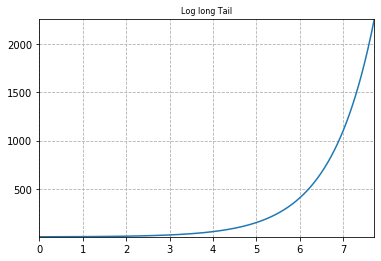

In [27]:
x_min = 0
x_max = log_plot

x = np.arange(x_min, x_max, .01)
y = np.exp(x)

plt.plot(x,y)

plt.xlim(x_min,x_max)
plt.ylim(np.exp(x_min),np.exp(x_max))

plt.grid(True,which="both", linestyle='--')

plt.title('Log long Tail', fontsize=8)

plt.savefig("matplotlib_grid_03.png", bbox_inches='tight')
#plt.close()

In [28]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
len(term_frequencies_log)


5382

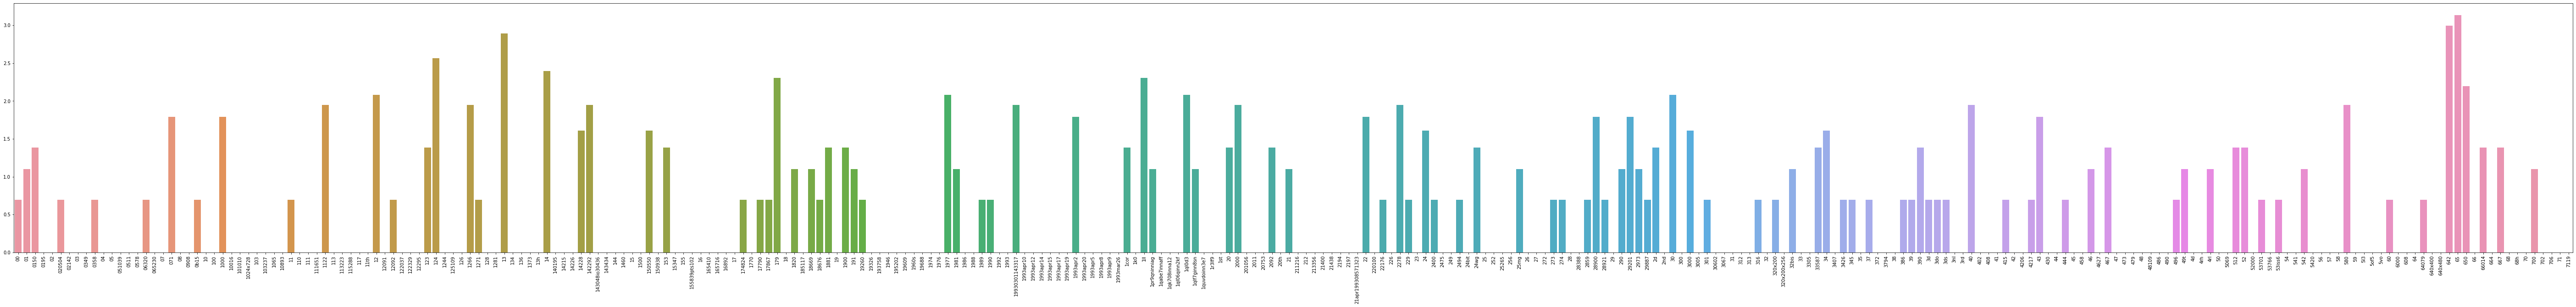

In [29]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [30]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [31]:
mlb.fit(X.category_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [32]:
X['any_category'] = mlb.transform(X['category_name']).tolist()

In [33]:
X.head(10)

,text,category,category_name,unigrams,any_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


Using category_name instead of category works brings back the same result when data [0:9] is looked at.


---